In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

import opensea.opensea_events as Events
import opensea.database as Database

In [2]:
#update opensea events
Events.update_opensea_events('ape-gang')
Events.update_opensea_events('ape-gang-old')



-----------------------------------------------------------
Getting ape-gang sales data...
0 sales found.
write sales to MongoDB
-----------------------------------------------------------
Getting ape-gang transfers data...
0 transfers found.
-----------------------------------------------------------
Getting ape-gang listings data...
Error in Opensea Events API call. Status code 429.
0 listings found.
-----------------------------------------------------------
Getting ape-gang cancellation data...
1 API calls made
0 cancellations found.
-----------------------------------------------------------
Getting ape-gang-old sales data...
0 sales found.
write sales to MongoDB
-----------------------------------------------------------
Getting ape-gang-old transfers data...
0 transfers found.
-----------------------------------------------------------
Getting ape-gang-old listings data...
1 API calls made
2 listings found.
updating ape-gang-old_listings with 2 documents.
-----------------------

In [3]:
#read from mongoDB
ag_sales = Database.read_mongo('ape-gang_sales',return_df=True).drop_duplicates(subset=['asset_id','time'])
ag_old_sales = Database.read_mongo('ape-gang-old_sales',return_df=True).drop_duplicates(subset=['asset_id','time'])
apes=Database.read_mongo('ape-gang-old_traits',return_df=True)

sales = ag_sales.append(ag_old_sales)
sales.head(10)

,sale_id,asset_id,sale_quantity,collection,image_url,time,event_type,seller_wallet,buyer_wallet,block_hash,sale_currency,sale_price
0,2698375415,5751,1,ape-gang,https://lh3.googleusercontent.com/e3L-yKjMmysf...,2022-01-01 07:30:14.840,successful,0x0bc2dab96f47dac7c58db9469402cf3c7775a537,0x6b3fc213d1ebe98e53cc823503c8c16bc68a5489,0x52c648accce24fe71a72ca26b9a0dd2641f1497ea323...,ETH,0.2600
1,2642866220,9746,1,ape-gang,https://lh3.googleusercontent.com/UHbf8YNt9NL2...,2021-12-28 06:34:59.230,successful,0x632e54a2b3ff7a8bc77f012a774badc023e5091b,0x48d5e28686a33341fd9bb0f255d597ea819adca0,0x687bdc23d21358167f709b85efeeba89fb52bc634542...,ETH,0.6600
2,2663109546,740,1,ape-gang,https://lh3.googleusercontent.com/PYCWQr6z5IAE...,2021-12-29 19:59:40.462,successful,0xdd5b2dd0d82c06f2fd2f3ea0ebfb36d8d271a1ca,0x7ac24abf71965b32f98fea17d64db28e4c948df6,0x0b75b8ab103d39a5869f7546f423c1aa5365b3fcd797...,ETH,0.2900
3,2589740656,3905,1,ape-gang,https://lh3.googleusercontent.com/vE59nS8MJLwV...,2021-12-24 03:48:42.417,successful,0xe823c38b4461fee1632bd4d4fd515dd81fb61dd4,0x14b94d4e8ae208e015c4657696eca6a0a668d30e,0x866b844eb0ccebab8ab31651b61c6a77ce020937c028...,WETH,0.2500
4,2695862012,6459,1,ape-gang,https://lh3.googleusercontent.com/_2nDxDHlEtTt...,2022-01-01 02:55:09.867,successful,0xfc55ff1ce47029b40e54506bacb9a2e833754b80,0x2e73fa8cfb5c1cfbf0b3881a0e945594c03add1b,0xb25962997aaa04885e2d1214b20a2760799c984ff08e...,ETH,0.6250
5,2666091561,5248,1,ape-gang,https://lh3.googleusercontent.com/xDNu521u70yB...,2021-12-30 01:04:01.565,successful,0x340a2818e60bb50b17e03864f7f7cbbc0d71374b,0x424e761128aa80b551330942a9da624bd59d0999,0x209491ac0c95e556a770c5096a328d48df74859720b0...,ETH,0.2600
6,2658155032,604,1,ape-gang,https://lh3.googleusercontent.com/C6M6mOQBAakI...,2021-12-29 10:57:05.862,successful,0x338fb79131f0300052d2aa22458fadc5f715c6e0,0xc7e139e4a70e88f58d936e238ac1887d518dc55c,0x15d8db93a82b72c6defd4bafcbdb369ae6f283a23824...,ETH,0.2900
7,2703163395,6274,1,ape-gang,https://lh3.googleusercontent.com/fB2Sl1l_NfBf...,2022-01-01 15:24:54.244,successful,0x0acbffc9a68923e91da0fab006d4f32f9dd6d1a1,0x60588ab5e599c7a03a1b175748c3e76221210e0d,0xce9ac0b7deca8def6f076db44f047d8405b5f8f433bd...,ETH,0.3100
8,2647751724,846,1,ape-gang,https://lh3.googleusercontent.com/IuoNjOXJLwco...,2021-12-28 15:48:02.793,successful,0x12414eb134404c4867e53a0d114a9129ea589897,0x3d559d0a7e6bda753008c9a0c138d9a1d6115d6f,0x26eb4236f806896e0fa4cca808ff94f1b97cd7b9d823...,ETH,0.2200
9,2565886796,4297,1,ape-gang,https://lh3.googleusercontent.com/gNsNCEU2o3L4...,2021-12-20 18:24:53.432,successful,0x9a13fe09af08a15d066e31048cedd0c778080c30,0x9060e198adbe6f2781591b2bc04763dafdf28521,0xdd95df5432da6f59921d569fbcdc92fcb9a20c6f81fc...,ETH,0.3399


In [4]:
day_n = 30
recent_sales = sales[sales.time > dt.datetime.now()-dt.timedelta(days=day_n)]
print(f"Age Gang {day_n} day sale volume= {round(recent_sales.sale_price.sum(),2)}Eth. With {recent_sales.shape[0]} sales and a median sale of {round(recent_sales.sale_price.median(),2)} Eth")



Age Gang 30 day sale volume= 202.87Eth. With 496 sales and a median sale of 0.35 Eth


In [5]:
recent_sales = recent_sales[['asset_id','sale_price','time']].merge(apes, on='asset_id',how='left').sort_values('sale_price',ascending=False)
recent_sales.head(10)

,asset_id,sale_price,time,name,Clothes,Ears,Eyes,Fur,Hat,Mouth,trait_n,Clothes_rarity,Ears_rarity,Eyes_rarity,Fur_rarity,Hat_rarity,Mouth_rarity,trait_n_rarity,factoral_rarity,rarity_rank
62,2775,3.00,2022-01-05 13:39:11.311,ApeGang #2775,Grey Striped T-Shirt,NaN,Robot,Robot,NaN,NaN,3,0.0259,0.7565,0.0265,0.0035,0.3096,0.3141,0.2239,374.262004,147
442,8889,2.00,2022-01-08 22:21:54.754,ApeGang #8889,Devil Wings,NaN,NaN,Brown,Fisherman,Baby Pacifier,4,0.0045,0.7565,0.3104,0.4242,0.0198,0.0337,0.3968,311.821930,256
269,5105,1.99,2022-01-15 06:21:51.078,ApeGang #5105,Devil Wings,NaN,Albino,Black,NaN,Beard,4,0.0045,0.7565,0.0170,0.0868,0.3096,0.0309,0.3968,332.000961,216
412,137,1.20,2022-01-04 18:29:55.259,ApeGang #137,Magician,Gold Hoop,Blind,White,Hippie Bandana,Flames,6,0.0277,0.0475,0.0144,0.0402,0.0182,0.0341,0.0546,254.059367,357
495,7229,1.10,2022-01-12 21:39:31.580,ApeGang #7229,Purple Hoodie,NaN,Black Sunglasses,Brown,Joker Hair,NaN,4,0.0232,0.7565,0.0453,0.4242,0.0036,0.3141,0.3968,352.339398,192
131,8534,1.10,2022-01-03 23:50:17.603,ApeGang #8534,Red NBA Jersey,Bluetooth Earpiece,Rainbow Sunglasses,Black,Cap,Nose Ring,6,0.0248,0.0520,0.0176,0.0868,0.0175,0.0318,0.0546,234.796685,469
67,315,1.00,2022-01-05 14:34:30.670,ApeGang #315,Groom,NaN,Gold Sunglasses,Brown,Headphone,NaN,4,0.0258,0.7565,0.0471,0.4242,0.0200,0.3141,0.3968,119.374229,7322
177,1383,1.00,2022-01-10 03:48:48.069,ApeGang #1383,NaN,NaN,NaN,Rainbow,NaN,Drool Rainbow,2,0.2202,0.7565,0.3104,0.0195,0.3096,0.0326,0.0388,120.044921,7261
257,6868,1.00,2022-01-15 16:43:15.948,ApeGang #6868,Lumberjack,Bluetooth Earpiece,3D Glasses,Red Devil,Red NBA Headband,NaN,5,0.0227,0.0520,0.0315,0.0162,0.0202,0.3141,0.2848,212.957945,787
202,716,0.99,2022-01-06 19:38:01.835,ApeGang #716,Batman,Diamond Stud,Bruised,Brown,NaN,Bubble Gum,5,0.0123,0.0483,0.0345,0.4242,0.3096,0.0280,0.2848,175.803128,2352


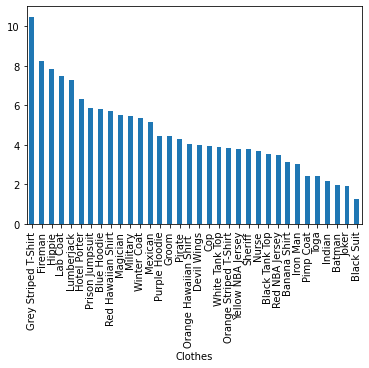

None


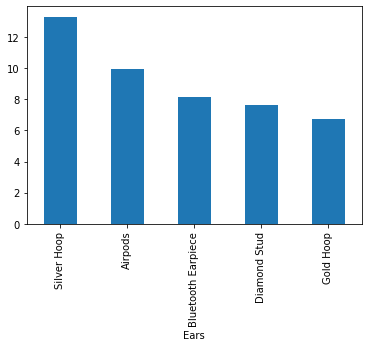

None


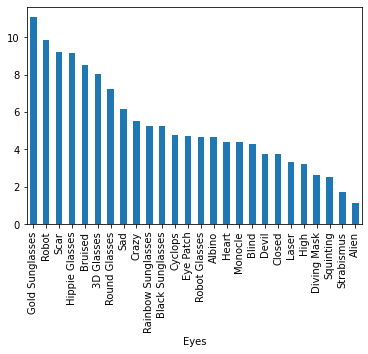

None


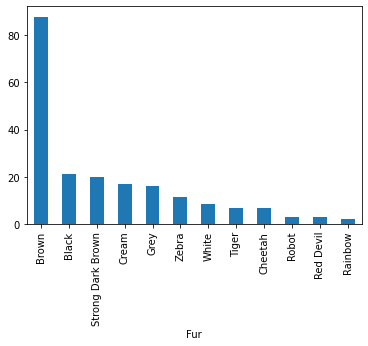

None


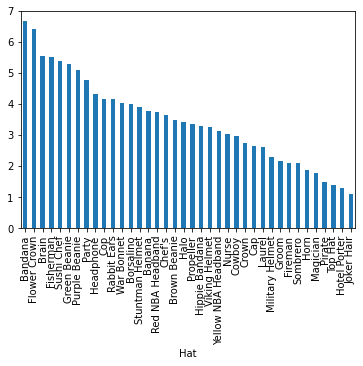

None


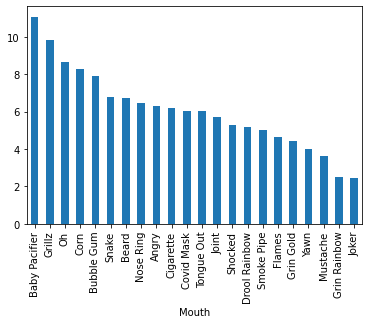

None


In [6]:
trait_list = ['Clothes','Ears','Eyes','Fur','Hat','Mouth']
for i in trait_list:
    plt.figure()
    recent_sales.groupby([i])['sale_price'].agg('sum').sort_values(ascending=False).plot(kind='bar')
    print(plt.show())

In [7]:
trait_price = pd.DataFrame()
for trait in trait_list:
    for i in recent_sales[trait].dropna().unique():
        df=recent_sales[recent_sales[trait]==i]
        trait_price= trait_price.append({'trait_class':trait,
                            'trait':i,
                            'num_sales':df.shape[0],
                            'median_price':df['sale_price'].median(),
                            '30day_volume': df['sale_price'].sum()},
                           ignore_index=True)
        
trait_price=trait_price.sort_values('median_price',ascending=False)
trait_price['trait_name']= trait_price['trait'].str.cat(' '+trait_price['trait_class'])

trait_price

,trait_class,trait,num_sales,median_price,30day_volume,trait_name
65,Fur,Robot,1.0,3.0000,3.0000,Robot Fur
1,Clothes,Devil Wings,2.0,1.9950,3.9900,Devil Wings Clothes
79,Hat,Joker Hair,1.0,1.1000,1.1000,Joker Hair Hat
83,Hat,Crown,4.0,0.7250,2.7500,Crown Hat
7,Clothes,Batman,3.0,0.6900,1.9600,Batman Clothes
...,...,...,...,...,...,...
104,Hat,Stuntman Helmet,11.0,0.3000,3.9249,Stuntman Helmet Hat
0,Clothes,Grey Striped T-Shirt,21.0,0.3000,10.4794,Grey Striped T-Shirt Clothes
109,Hat,War Bonnet,13.0,0.2990,4.0550,War Bonnet Hat
111,Hat,Chef's,12.0,0.2975,3.6635,Chef's Hat


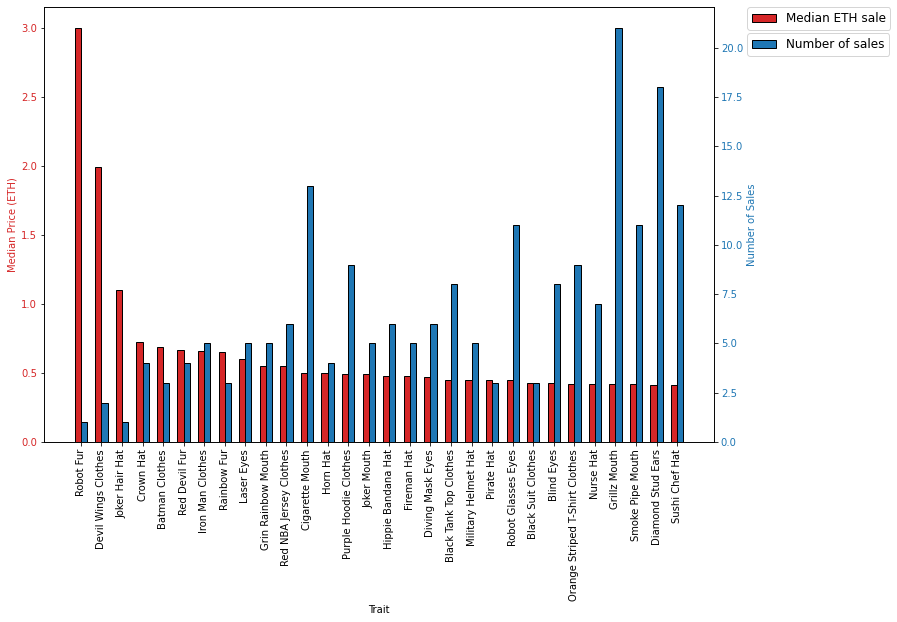

None


In [8]:
#make a plot of survival data
top_n = 30
barWidth = 0.3
x1 = np.arange(top_n)
x2 = [x + barWidth for x in x1]

fig, ax1 = plt.subplots(figsize=(12,8))
color1 = 'tab:red'
ax1.set_xlabel('Trait')
ax1.set_ylabel('Median Price (ETH)', color=color1)
ax1.bar(x1, trait_price['median_price'].iloc[0:top_n], width = barWidth, color = color1, edgecolor = 'black', label='Median ETH sale')
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx() 
color2 = 'tab:blue'
ax2.set_ylabel('Number of Sales', color=color2)  # we already handled the x-label with ax1
ax2.bar(x2, trait_price['num_sales'].iloc[0:top_n], width = barWidth, color = color2, edgecolor = 'black', label='Number of sales')
ax2.tick_params(axis='y', labelcolor=color2)

#labels for plot
plt.xticks([r + barWidth/2 for r in range(top_n)], trait_price['trait_name'].iloc[0:top_n],rotation =90)
for label in ax1.get_xticklabels():
      label.set_rotation(90)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,fontsize=12)
ax2.legend(bbox_to_anchor=(1.05, 0.94), loc='upper left', borderaxespad=0,fontsize=12)
#plt.title(f'Survival rate of titanic passengers by {discrete_var}')
print(plt.show())

In [9]:
import seaborn as sns
palette

NameError: name 'palette' is not defined

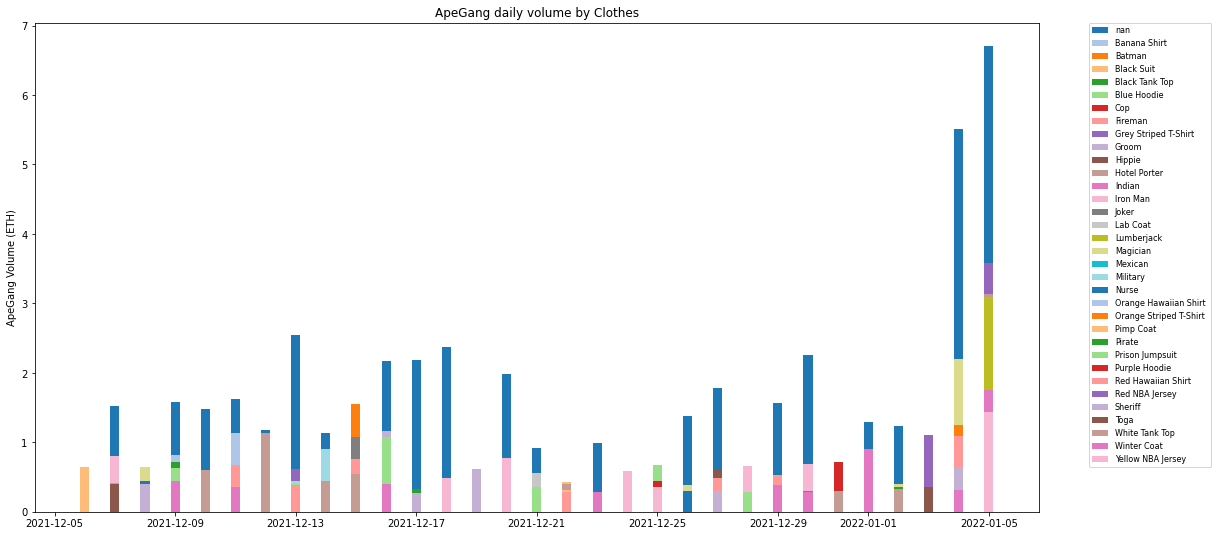

None


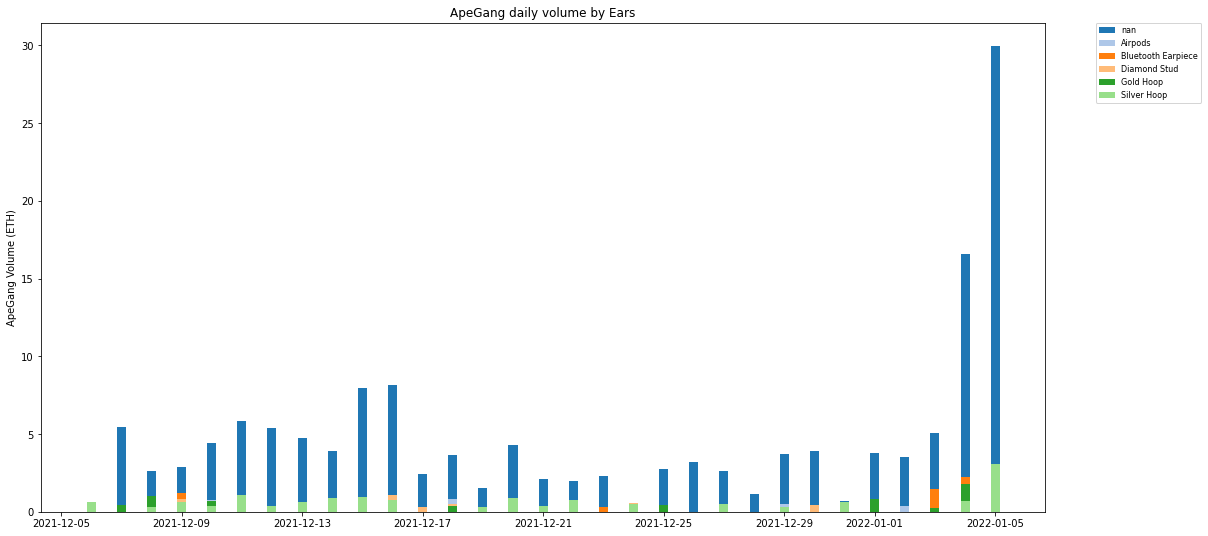

None


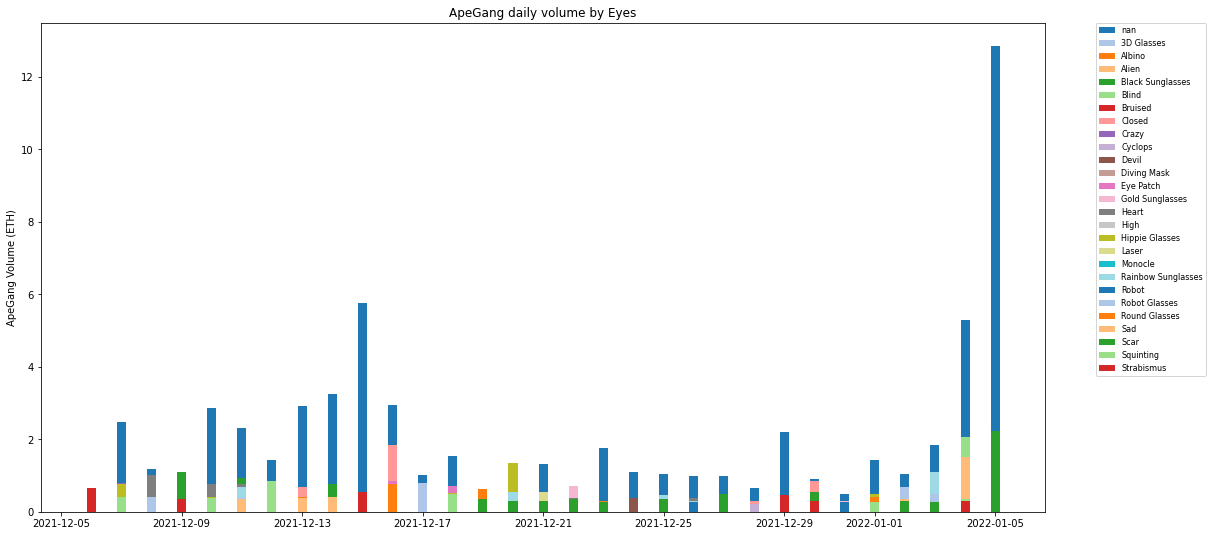

None


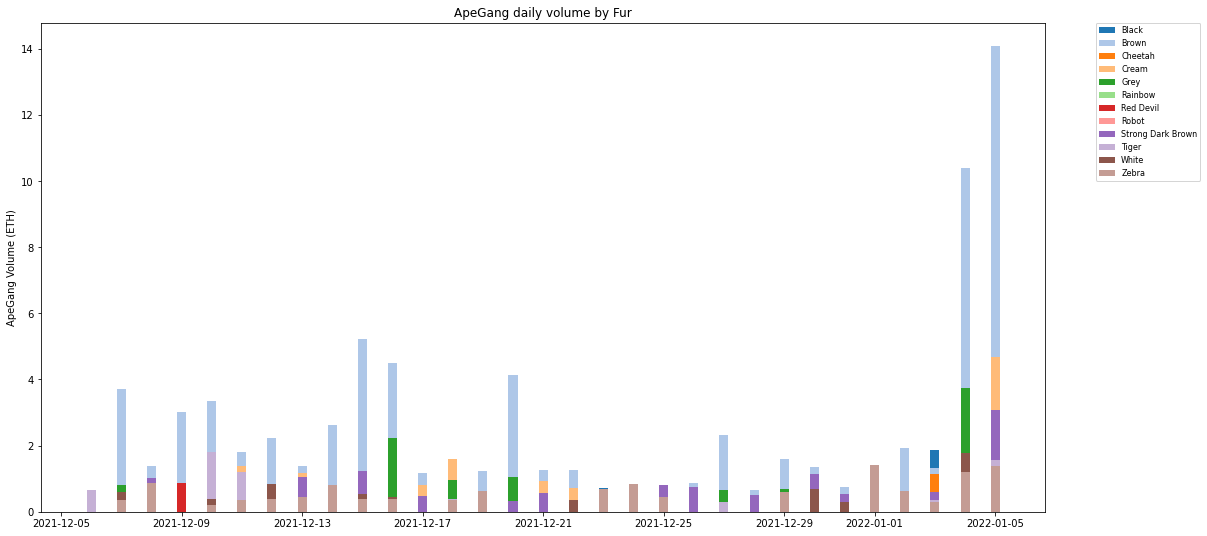

None


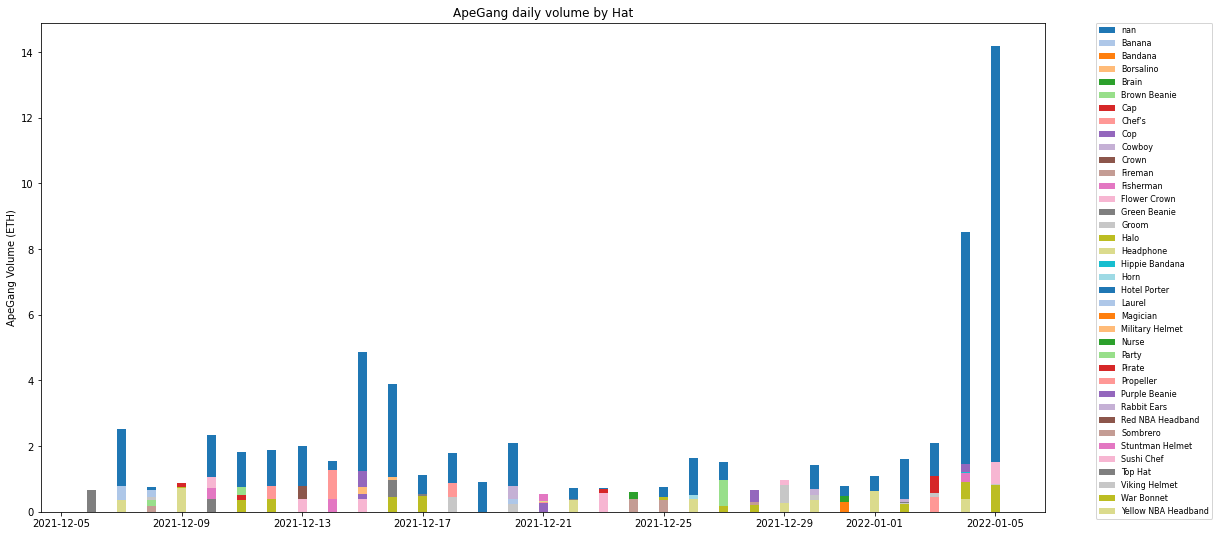

None


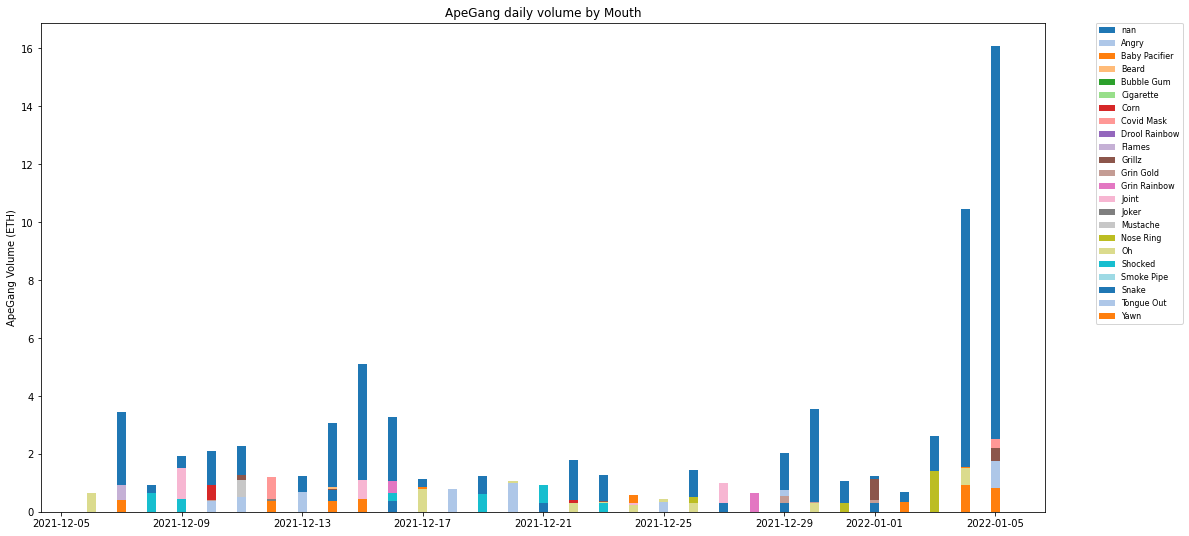

None


In [ ]:
recent_sales['day'] = recent_sales.time.dt.date
for trait in trait_list:
    df = pd.DataFrame(recent_sales.groupby([trait,'day'],dropna=False)['sale_price'].agg('sum')).reset_index()#.sort_values(ascending=False).plot(kind='bar')
    df['day'] = pd.to_datetime(df['day'])
    df2= df.pivot(index='day',columns=trait,values='sale_price')
    palette = sns.color_palette('tab20', len(df2.columns))
    

    fig, ax = plt.subplots(figsize=(18,9))
    for i , col in enumerate(df2.columns):
        ax.bar(df2.index, df2[col], 0.3,label=col,color=palette[i] )
        
    ax.set_ylabel('ApeGang Volume (ETH)')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,fontsize=8)
    ax.set_title(f'ApeGang daily volume by {trait}')
    print(plt.show())



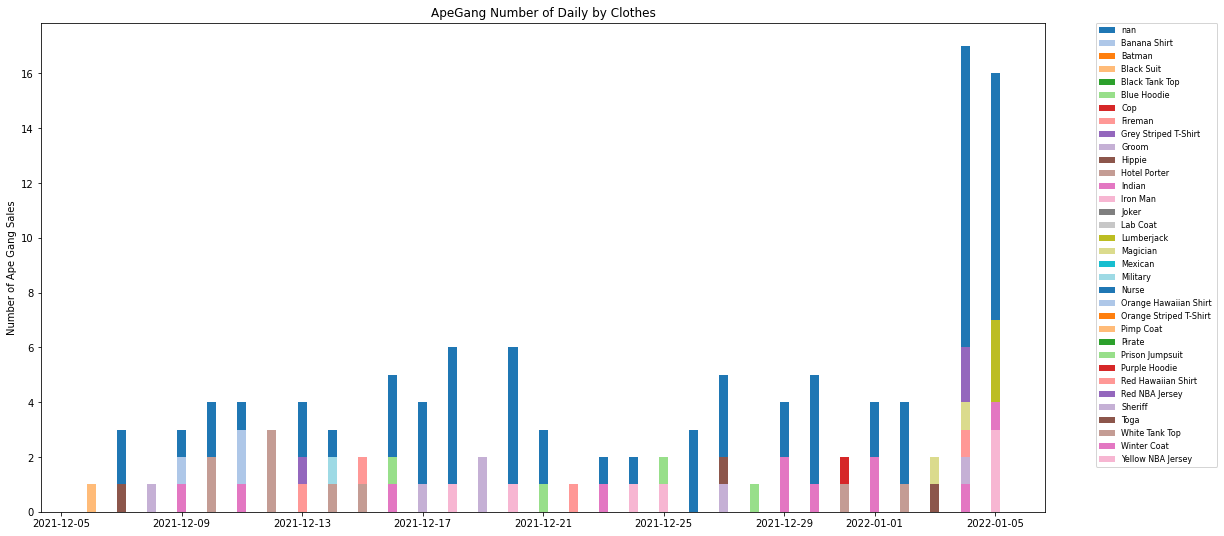

None


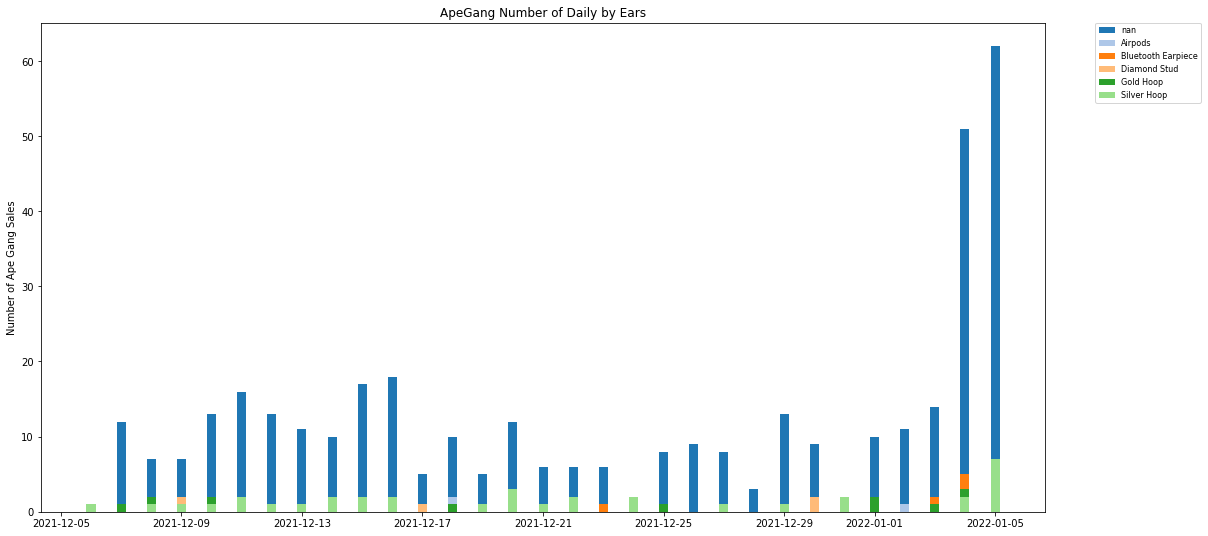

None


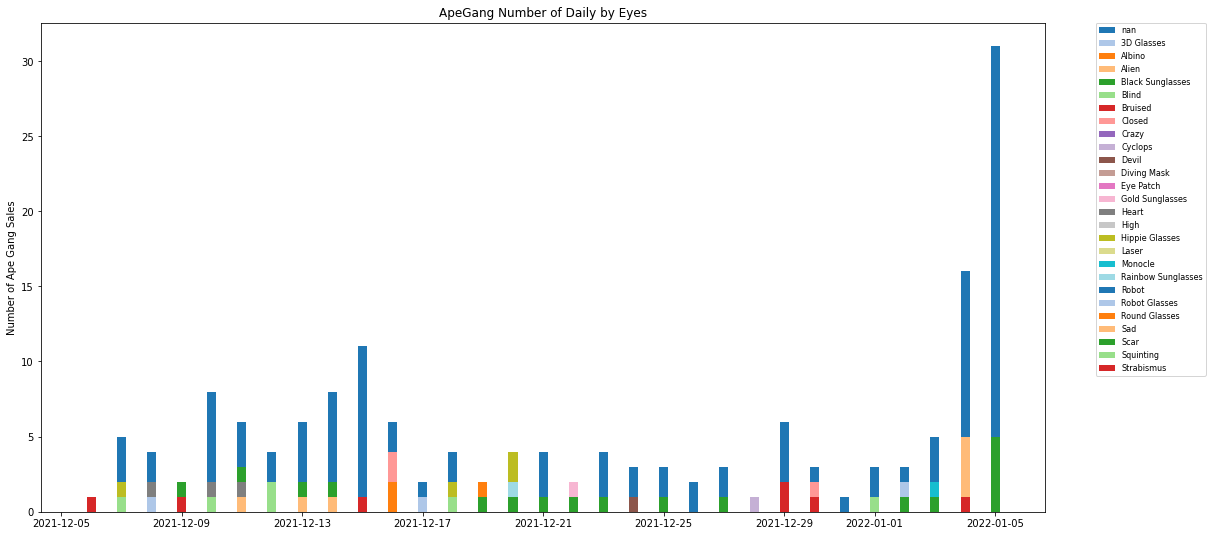

None


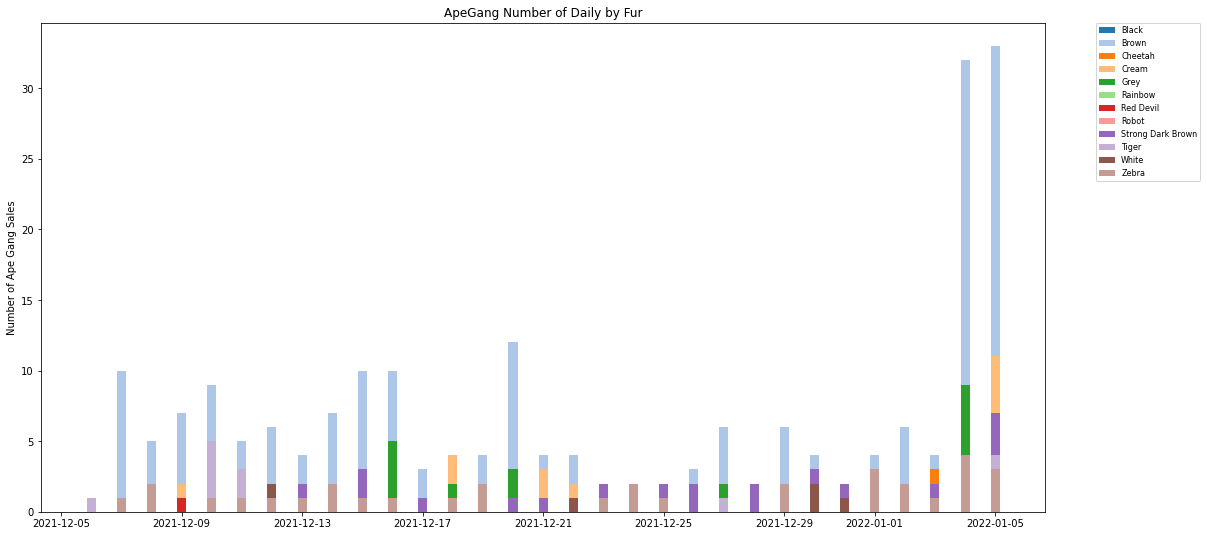

None


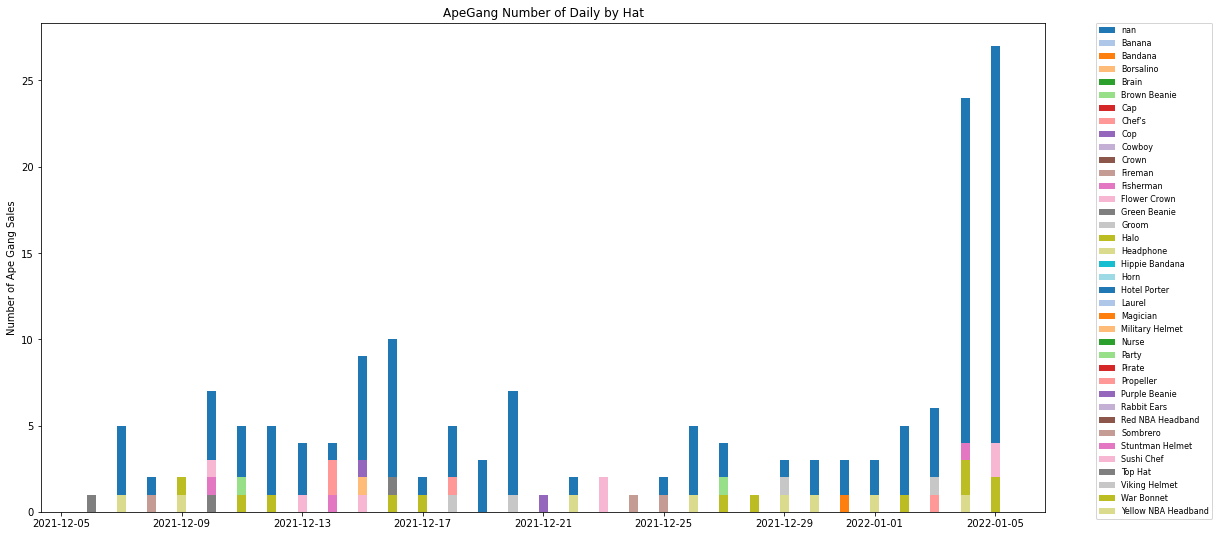

None


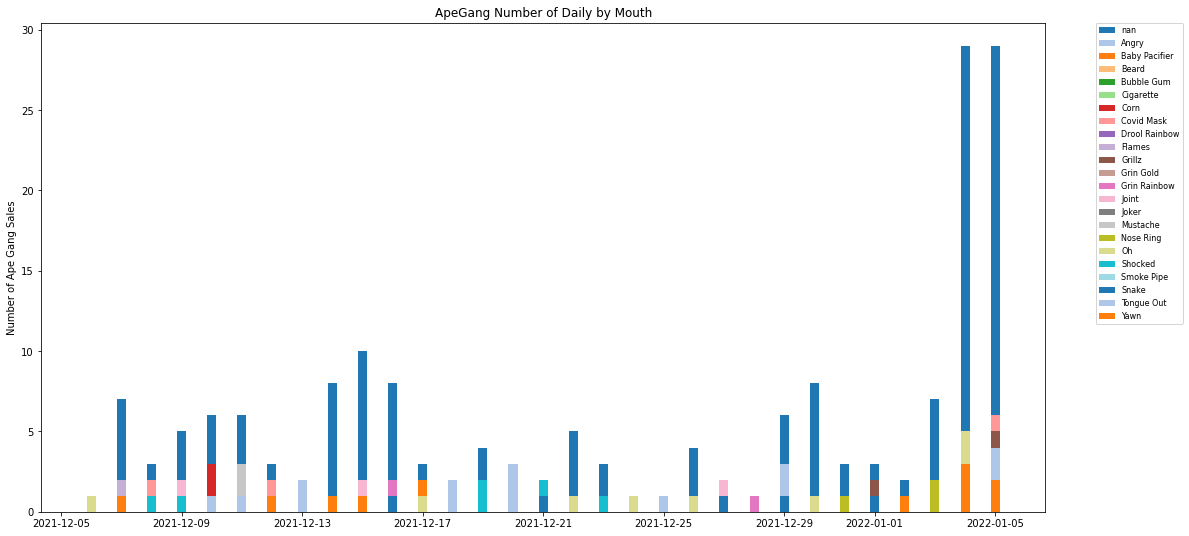

None


In [ ]:
for trait in trait_list:
    df = pd.DataFrame(recent_sales[[trait,'day']].value_counts(dropna=False)).reset_index().rename(columns={0:'n_sales'})
    df['day'] = pd.to_datetime(df['day'])
    df2= df.pivot(index='day',columns=trait,values='n_sales')
    palette = sns.color_palette('tab20', len(df2.columns))
    

    fig, ax = plt.subplots(figsize=(18,9))
    for i , col in enumerate(df2.columns):
        ax.bar(df2.index, df2[col], 0.3,label=col,color=palette[i] )
        
    ax.set_ylabel('Number of Ape Gang Sales')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,fontsize=8)
    ax.set_title(f'ApeGang Number of Daily by {trait}')
    print(plt.show())
    
                      
    

In [ ]:
collection = 'cool-cats-nft'
sales_period = 7

Events.update_opensea_events(collection)
sales = Database.read_mongo(f'{collection}_sales',return_df=True).drop_duplicates(subset=['asset_id','time'])
recent_sales = sales[sales.time > dt.datetime.now()-dt.timedelta(days=sales_period)]
print(f"{collection} {sales_period} day sale volume= {round(recent_sales.sale_price.sum(),2)}Eth. With {recent_sales.shape[0]} sales and a median sale of {round(recent_sales.sale_price.median(),2)} Eth")




-----------------------------------------------------------
Getting cool-cats-nft sales data...
1 API calls made
2 API calls made
3 API calls made
4 API calls made
5 API calls made
244 sales found.
write sales to MongoDB
updating cool-cats-nft_sales with 244 documents.
-----------------------------------------------------------
Getting cool-cats-nft transfers data...
1 API calls made
2 API calls made
3 API calls made
4 API calls made
5 API calls made
6 API calls made
7 API calls made
8 API calls made
394 transfers found.
updating cool-cats-nft_transfers with 394 documents.
-----------------------------------------------------------
Getting cool-cats-nft listings data...
1 API calls made
2 API calls made
3 API calls made
4 API calls made
5 API calls made
6 API calls made
7 API calls made
8 API calls made
9 API calls made
10 API calls made
11 API calls made
12 API calls made
13 API calls made
14 API calls made
15 API calls made
16 API calls made
17 API calls made
18 API calls made
19 API